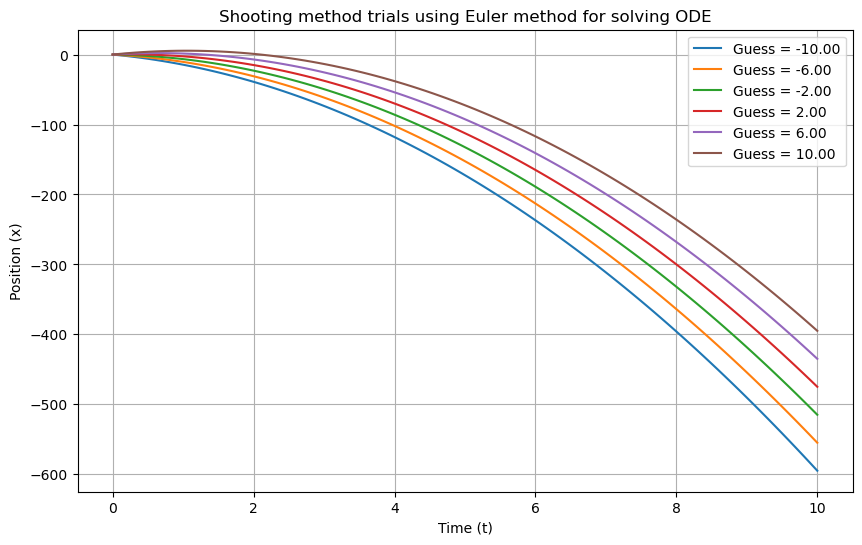

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE system
def ode_system(x, t):
    dxdt = np.array([x[1], -10])  # x[0] = position, x[1] = velocity
    return dxdt

# Euler method solver
def euler_solve(ode, initial_condition, t):
    x = np.array(initial_condition)
    solution = [x[0]]
    h = t[1] - t[0]  # Step size
    for i in range(1, len(t)):
        x = x + h * np.array(ode(x, t[i]))
        solution.append(x[0])
    return solution

# Define the shooting method
def shooting_method(guess):
    t = np.linspace(0, 10, 100)  # Time grid
    x0 = [0, guess]  # Initial conditions, guess for x'(0)
    x = euler_solve(ode_system, x0, t)  # Solve the ODE
    return t, x

# Define range for initial guess
guesses = np.linspace(-10, 10, 6)

# Plot results for each trial
plt.figure(figsize=(10, 6))
for guess in guesses:
    t, x = shooting_method(guess)
    plt.plot(t, x, label=f'Guess = {guess:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Shooting method trials using Euler method for solving ODE')
plt.grid(True)
plt.legend()
plt.show()
